<a href="https://colab.research.google.com/github/mile-ribeiro/Ibov/blob/main/Tech_IBOV_10_anos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

In [2]:
df = pd.read_csv('/content/Dados Históricos - Ibovespa_10.csv', sep=';', quotechar='"')

In [3]:
df

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,10.07.2025,136.743,137.472,137.472,136.014,"9,57B","-0,54%"
1,09.07.2025,137.481,139.303,139.331,137.299,"7,58B","-1,31%"
2,08.07.2025,139.303,139.491,139.591,138.770,"6,75B","-0,13%"
3,07.07.2025,139.490,141.265,141.342,139.295,"6,12B","-1,26%"
4,04.07.2025,141.264,140.928,141.564,140.597,"3,31B","0,24%"
...,...,...,...,...,...,...,...
2476,16.07.2015,53.070,52.902,53.417,52.714,"2,14M","0,32%"
2477,15.07.2015,52.902,53.239,53.334,52.790,"2,61M","-0,63%"
2478,14.07.2015,53.239,53.119,53.416,52.653,"2,74M","0,23%"
2479,13.07.2015,53.119,52.591,53.164,52.591,"2,69M","1,00%"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      2481 non-null   object 
 1   Último    2481 non-null   float64
 2   Abertura  2481 non-null   float64
 3   Máxima    2481 non-null   float64
 4   Mínima    2481 non-null   float64
 5   Vol.      2480 non-null   object 
 6   Var%      2481 non-null   object 
dtypes: float64(4), object(3)
memory usage: 135.8+ KB


In [5]:
df.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,1
Var%,0


In [6]:
#Convertendo a coluna "Data" em datetime
df["Data"] = pd.to_datetime(df["Data"], format = '%d.%m.%Y', errors='coerce')

#Definindo a coluna "Data" como índece e ordenando-a
df = df.set_index('Data').sort_index()

# Reindexando para ter uma linha por dia, preenchendo valores ausentes com o último valor disponível
df = df.asfreq('D', method='ffill')

# Preenchendo valores ausentes nas outras colunas com o último valor
for column in df.columns:
    df[column] = df[column].fillna(method='ffill')

# Resetar o índice
df.reset_index(inplace=True)

/tmp/ipython-input-3594275709.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].fillna(method='ffill')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      3654 non-null   datetime64[ns]
 1   Último    3654 non-null   float64       
 2   Abertura  3654 non-null   float64       
 3   Máxima    3654 non-null   float64       
 4   Mínima    3654 non-null   float64       
 5   Vol.      3654 non-null   object        
 6   Var%      3654 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 200.0+ KB


In [8]:
#Renomeando colunas
df = df.rename(columns={'Data': 'dt', 'Último': 'y'})

#Mantendo apenas as colunas necessárias para análise
df = df[['dt', 'y']]

df.head()

,dt,y
0,2015-07-10,52.591
1,2015-07-11,52.591
2,2015-07-12,52.591
3,2015-07-13,53.119
4,2015-07-14,53.239


In [9]:
# Criando novo dataframe com colunas de interesse
df5 = df[['dt', 'y']].set_index('dt')

In [10]:
df5.head(2)

,y
dt,
2015-07-10,52.591
2015-07-11,52.591


In [11]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [12]:
sns.set_style('darkgrid')

In [13]:
X = df5['y'].values

In [14]:
# Rodando o teste ADF
resultado = adfuller(X)

# Exibindo os resultados
print('Estatística ADF:', resultado[0])
print('Valor-p:', resultado[1])
print('Nº de lags:', resultado[2])
print('Nº de observações:', resultado[3])
print('Valores críticos:')
for chave, valor in resultado[4].items():
    print(f'{chave}: {valor}')

Estatística ADF: -1.5734660478855576
Valor-p: 0.4969072003800183
Nº de lags: 15
Nº de observações: 3638
Valores críticos:
1%: -3.432148768574872
5%: -2.862334795726108
10%: -2.5671930819481976


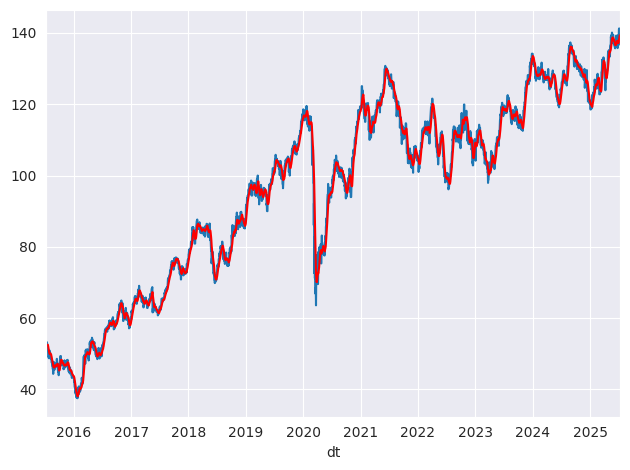

In [15]:
ma = df5.rolling(12).mean()

f, ax = plt.subplots()
df5.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

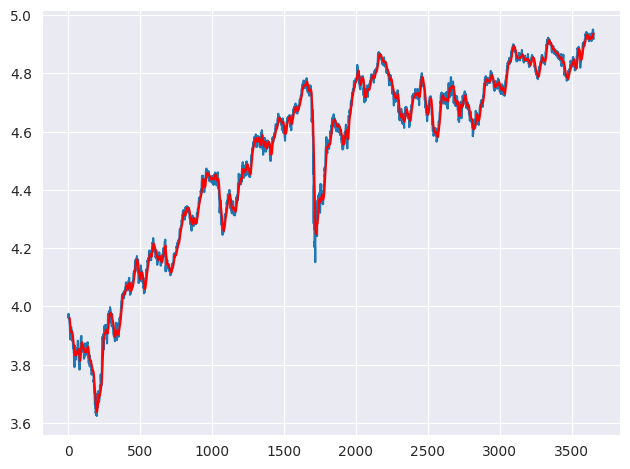

In [16]:
df5_log = np.log(df.select_dtypes(include=[np.number]))  # Seleciona apenas as colunas numéricas
ma_log = df5_log.rolling(12).mean()

f, ax = plt.subplots()
df5_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

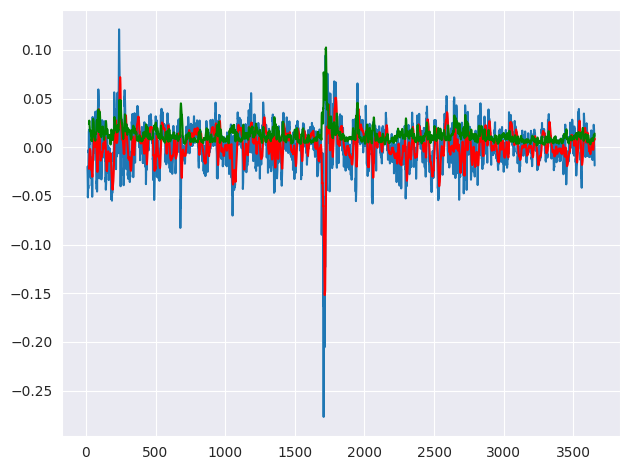

In [17]:
# Garantir que df_log seja numérico
df_log = np.log(df.select_dtypes(include=[np.number]))  # Aplicar log somente nas colunas numéricas

# Calcular a média móvel
ma_log = df_log.rolling(12).mean()

# Calcular a diferença (df_s) e remover NaN
df_s = (df_log - ma_log).dropna()

# Calcular a média móvel e o desvio padrão de df_s
ma_s = df_s.rolling(12).mean()
std = df_s.rolling(12).std()

# Plotando os resultados
f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


In [18]:
# Garantir que df_s tenha a coluna 'y' sem NaN
df_s_clean = df_s.dropna(subset=['y'])

# Extrair os valores da coluna 'y' para o teste ADF
X_s = df_s_clean['y'].values

# Aplicar o teste ADF
result_s = adfuller(X_s)

# Exibir o resultado do teste ADF
print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

# Exibir os valores críticos para diferentes níveis de significância
for key, value in result_s[4].items():
    print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -12.111856684485891
P-Value: 1.911249633625811e-22
Valores críticos:
	1%: -3.4321542277654946
	5%: -2.8623372071683546
	10%: -2.567194365720777


Teste ADF
Teste Estatístico: -17.031227860542135
P-Value: 8.322448168620462e-30
Valores críticos:
	1%: -3.4321607224119237
	5%: -2.8623400759880133
	10%: -2.5671958929870278


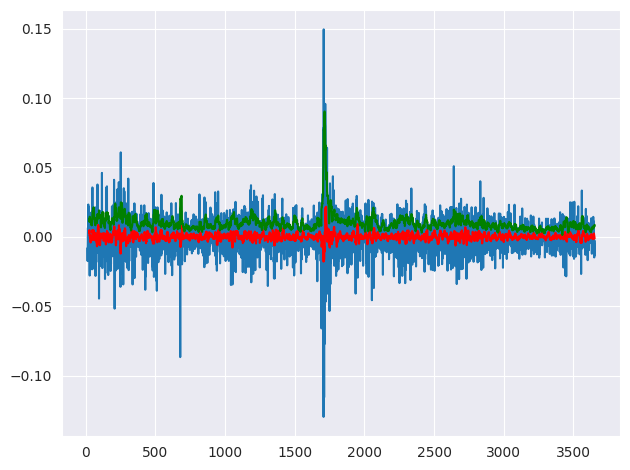

In [19]:
# Calcular a diferença da série
df_diff = df_s.diff(1)

# Calcular a média móvel e o desvio padrão
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

# Plotando os resultados
f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

# Realizar o teste ADF na série diferenciada
X_diff = df_diff['y'].dropna().values
result_diff = adfuller(X_diff)

# Exibir o resultado do teste ADF
print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

# Exibir os valores críticos para diferentes níveis de significância
for key, value in result_diff[4].items():
    print(f"\t{key}: {value}")


In [20]:
df_s.head(2)

,y
11,-0.020007
12,-0.028210


In [21]:
# Supondo que o df_base tem as datas no índice ou coluna 'dt'
datas = df5.index[-len(df_s):]  # pega as últimas datas, do mesmo tamanho de df_s

# Substituir a coluna 'ds' pelos valores corretos
df_s['ds'] = datas.values

print(df_s.head(5))


           y         ds
11 -0.020007 2015-07-21
12 -0.028210 2015-07-22
13 -0.045699 2015-07-23
14 -0.051550 2015-07-24
15 -0.045241 2015-07-25


In [22]:
df_s.head(2)

,y,ds
11,-0.020007,2015-07-21
12,-0.028210,2015-07-22


In [23]:
# Garantir que a coluna 'ds' é datetime
df_s['ds'] = pd.to_datetime(df_s['ds'])

# Ordenar pelo tempo (caso necessário)
df_s = df_s.sort_values('ds').reset_index(drop=True)

# Criar a variável alvo: 1 se subir no dia seguinte, 0 caso contrário
df_s['target'] = (df_s['y'].shift(-1) > df_s['y']).astype(int)

# Criar features baseadas em y
df_s['ret_1d'] = df_s['y'].pct_change()  # Retorno diário
df_s['sma_5'] = df_s['y'].rolling(5).mean()  # Média móvel de 5 dias
df_s['sma_10'] = df_s['y'].rolling(10).mean()  # Média móvel de 10 dias
df_s['vol_5'] = df_s['ret_1d'].rolling(5).std()  # Volatilidade dos últimos 5 dias

# Remover NaNs gerados
df_s.dropna(inplace=True)

# Dividir em treino e teste
test_size = 1072
train = df_s[:-test_size]
test = df_s[-test_size:]

# Features e alvo
X_train = train[['ret_1d', 'sma_5', 'sma_10', 'vol_5']]
y_train = train['target']

X_test = test[['ret_1d', 'sma_5', 'sma_10', 'vol_5']]
y_test = test['target']

print(f"Tamanho treino: {len(train)}, teste: {len(test)}")


Tamanho treino: 2562, teste: 1072


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar e treinar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever no teste
y_pred = model.predict(X_test)

# Avaliar acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 63.53%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       550
           1       0.63      0.61      0.62       522

    accuracy                           0.64      1072
   macro avg       0.63      0.63      0.63      1072
weighted avg       0.64      0.64      0.64      1072



In [25]:
df5.head(2)

,y
dt,
2015-07-10,52.591
2015-07-11,52.591


In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2015-07-10 to 2025-07-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       3654 non-null   float64
dtypes: float64(1)
memory usage: 57.1 KB


In [27]:
df5['target'] = (df5['y'].shift(-1) > df5['y']).astype(int)
df5 = df5.dropna()  # removendo última linha

# 1 se o IBOVESPA subir no dia seguinte
# 0 se cair ou se mantiver igual
# Criando a variável alvo (target): 1 se o fechamento do dia seguinte for maior que o de hoje (alta), 0 caso contrário (baixa ou estável).
# Isso é feito comparando o valor de amanhã (shift(-1)) com o valor de hoje e (astype(int) convertendo o resultado de 1 ou 0 (booleano) para inteiro.

In [28]:
# 1. Criar a coluna target (1 se subir no dia seguinte, 0 caso contrário)
df5['target'] = (df5['y'].shift(-1) > df5['y']).astype(int)

# 2. Criar as features (indicadores)
df5['ret_1d'] = df5['y'].pct_change()  # retorno diário
df5['sma_5'] = df5['y'].rolling(5).mean()  # média móvel 5 dias
df5['sma_10'] = df5['y'].rolling(10).mean()  # média móvel 10 dias
df5['vol_5'] = df5['ret_1d'].rolling(5).std()  # volatilidade 5 dias

# 3. Remover linhas com NaN (causadas por rolling)
df5.dropna(inplace=True)

# 4. Dividir treino e teste
test_size = 1072
train = df5[:-test_size]
test = df5[-test_size:]

# 5. Separar X e y
X_train = train[['ret_1d', 'sma_5', 'sma_10', 'vol_5']]
y_train = train['target']

X_test = test[['ret_1d', 'sma_5', 'sma_10', 'vol_5']]
y_test = test['target']

print("Colunas disponíveis:", df5.columns)
print("Tamanho treino:", len(train), "Tamanho teste:", len(test))


Colunas disponíveis: Index(['y', 'target', 'ret_1d', 'sma_5', 'sma_10', 'vol_5'], dtype='object')
Tamanho treino: 2573 Tamanho teste: 1072


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Previsão
y_pred = modelo.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório:\n", classification_report(y_test, y_pred))


Acurácia: 0.6296641791044776

Relatório:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75       701
           1       0.43      0.20      0.28       371

    accuracy                           0.63      1072
   macro avg       0.55      0.53      0.51      1072
weighted avg       0.59      0.63      0.59      1072



In [30]:
df5['target'].value_counts()
# 0: queda ou estável
# 1:subida

,count
target,
0,2352
1,1293


In [31]:
df5['target'].value_counts(normalize=True) * 100


,proportion
target,
0,64.526749
1,35.473251


In [32]:
# Treinar modelo com pesos balanceados
modelo = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar desempenho
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.63

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       701
           1       0.42      0.20      0.27       371

    accuracy                           0.63      1072
   macro avg       0.54      0.53      0.51      1072
weighted avg       0.58      0.63      0.58      1072

